In [4]:
import matplotlib.pyplot as plt

import h5py
import numpy as np
import pandas as pd
import random
import torch
import os
from collections import Counter

In [5]:
from IPython.display import clear_output
from IPython.core.display import HTML
HTML("<style>.container { width:98% !important; }</style>")

In [6]:
os.chdir("..")
print("Current working directory:", os.getcwd())

Current working directory: /usr/WS1/ranganath2/code/fast2


In [7]:
data_dir = "./data/mpro"
file_name = "gmd_postera_protease_pos.h5"


file_path = os.path.join(data_dir, file_name)
print(os.path.exists(file_path))

True


In [8]:
data = h5py.File(file_path, 'r')
data_names = list(data)
print(len(data_names))
data_names[:15]

15010


['AAR-POS-0daf6b7e-23_protease_1',
 'AAR-POS-0daf6b7e-23_protease_10',
 'AAR-POS-0daf6b7e-23_protease_2',
 'AAR-POS-0daf6b7e-23_protease_3',
 'AAR-POS-0daf6b7e-23_protease_4',
 'AAR-POS-0daf6b7e-23_protease_5',
 'AAR-POS-0daf6b7e-23_protease_6',
 'AAR-POS-0daf6b7e-23_protease_7',
 'AAR-POS-0daf6b7e-23_protease_8',
 'AAR-POS-0daf6b7e-23_protease_9',
 'AAR-POS-5507155c-1_protease_1',
 'AAR-POS-5507155c-1_protease_10',
 'AAR-POS-5507155c-1_protease_2',
 'AAR-POS-5507155c-1_protease_3',
 'AAR-POS-5507155c-1_protease_4']

In [12]:
idx = 0
name = data_names[idx]

for k in data[name].keys():
    print(k)
    for info in data[name][k]:
        print("  ", data[name][k][info])

spatial
   <HDF5 dataset "coords": shape (442, 3), type "<f4">
   <HDF5 dataset "dists": shape (442, 442), type "<f4">
   <HDF5 dataset "node_feats": shape (442, 20), type "<f4">
voxelized
   <HDF5 dataset "data0": shape (19, 48, 48, 48), type "<f4">


In [13]:
sum(["protease" in docking_id for docking_id in data_names])

15010

In [17]:
def get_compound_id(docking_id):
    if "protease" in docking_id:
        return docking_id.rsplit("_", 2)[0]
    else:
        return docking_id

compound_ids = set([get_compound_id(docking_id) for docking_id in data_names])

print(len(compound_ids))
list(compound_ids)[:10]

1501


['MAT-POS-9db1e783-3',
 'LON-WEI-4d77710c-2',
 'ALP-POS-305f6ec3-7',
 'ALP-POS-d0876c20-3',
 'ALP-POS-a3de0cb1-7',
 'MAT-POS-86c60949-2',
 'MAT-POS-590ac91e-41',
 'MAT-POS-24589f88-16',
 'MAT-POS-96f51285-3',
 'COM-UCB-8c7d23dc-15']

In [20]:
compound_ids_list = [get_compound_id(docking_id) for docking_id in data_names]
print(len(compound_ids_list))

15010


In [21]:
compound_info = pd.read_csv(os.path.join(data_dir, "updated_mpro_positive_compounds.csv"))
compound_info = compound_info[compound_info.activity_type == "pIC50"]
compound_info

,compound_id,SMILES,relation,activity,activity_type
0,GoStar-gvk_125547054,CC(C)(C)NC(=O)N[C@H](C(=O)N1C[C@H]2[C@@H]([C@H...,NaN,5.681024,pIC50
1,PostEra-EDJ-MED-cf4b0d25-4,CC(=O)NC(C(=O)Nc1cncc2ccccc12)c1cccc(Cl)c1,NaN,5.039634,pIC50
2,PostEra-EDJ-MED-976a33d5-1,CNC(=O)C1(N2CC3(CCN(c4cncc5ccccc45)C3=O)c3cc(C...,NaN,7.044005,pIC50
3,PostEra-MAT-POS-044491d2-1,Cc1ccncc1NC(=O)Cc1cc(Cl)cc(NC2CCCC2O)c1,NaN,4.705479,pIC50
4,PostEra-MAT-POS-932d1078-3,CO[C@@]1(C(=O)Nc2cncc3ccccc23)CCOc2c(F)cc(F)cc21,NaN,6.691330,pIC50
...,...,...,...,...,...
2264,GoStar-gvk_125563878,CC(C)C[C@H](NC(=O)OCC(C)(C)c1cccc(Cl)c1)C(=O)N...,NaN,7.000000,pIC50
2265,GoStar-gvk_125563953,O=C[C@H](CC1CC2(CCCC2)NC1=O)NC(=O)[C@H](CC1CCC...,NaN,6.975925,pIC50
2266,GoStar-gvk_125563804,CCCCCOC(=O)N[C@@H](CC1CCCCC1)C(=O)N[C@H](C=O)C...,NaN,4.422508,pIC50
2267,GoStar-gvk_125436286,CC(C)(C)C[C@H](NC(=O)c1cc2c(Cl)cc(Cl)cc2[nH]1)...,>,5.698970,pIC50


<Axes: >

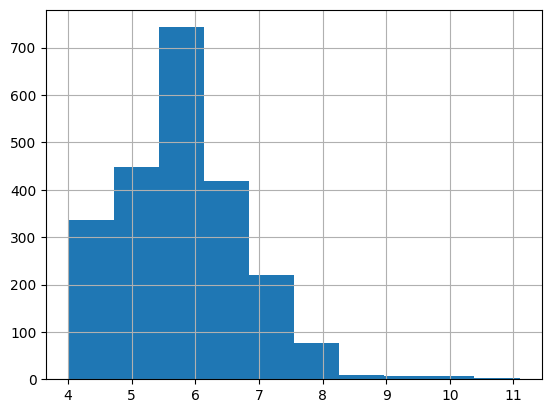

In [22]:
compound_info.activity.hist()

In [23]:
compound_info.activity.isna().value_counts()

activity
False    2269
Name: count, dtype: int64

In [24]:
def remove_substring(cid, substrings_to_remove=["PostEra-", "GoStar-", "other-"]):
    for substring in substrings_to_remove:
        cid = cid.replace(substring, "")
    return cid

compound_ids_from_info = set([remove_substring(cid) for cid in compound_info.compound_id])
intersection_info = compound_ids.intersection(compound_ids_from_info)
print(len(intersection_info))

common_compound_ids = list(intersection_info)

941


In [26]:
common_compound_ids

['MAT-POS-9db1e783-3',
 'LON-WEI-4d77710c-2',
 'MAK-UNK-8be7dca9-1',
 'EDG-MED-ba1ac7b9-9',
 'ALP-POS-5bb456a5-7',
 'ALP-POS-6d96567b-2',
 'LON-WEI-8f408cad-1',
 'MAK-UNK-af83ef51-6',
 'ALP-POS-696356e4-1',
 'ALP-POS-e980f4ea-32',
 'EDJ-MED-4c7486ba-8',
 'KAD-UNI-80f122c8-2',
 'RAL-THA-2d450e86-34',
 'EDJ-MED-611d11e7-8',
 'DAV-CRI-3edb475e-6',
 'MAT-POS-044491d2-6',
 'AAR-POS-d2a4d1df-27',
 'MAT-POS-86c60949-2',
 'EDJ-MED-3c65e9ce-4',
 'ALP-UNI-3735e77e-1',
 'LON-WEI-b8d98729-39',
 'EDG-MED-ba1ac7b9-18',
 'MAT-POS-993cdc78-1',
 'BEN-DND-7e92b6ca-16',
 'MAT-POS-590ac91e-41',
 'MAT-POS-4223bc15-14',
 'MED-COV-4280ac29-31',
 'STU-CHA-6cae54d3-1',
 'MAT-POS-932d1078-3',
 'ALP-POS-305f6ec3-46',
 'MAT-POS-24589f88-16',
 'MAT-POS-96f51285-3',
 'JIN-POS-6dc588a4-14',
 'MAT-POS-f9802937-6',
 'MAT-POS-c9973a83-1',
 'RAL-THA-e002e396-1',
 'LON-WEI-adc59df6-17',
 'MAT-POS-ee51dedd-2',
 'MAT-POS-e9e99895-5',
 'MAT-POS-61f37a1a-13',
 'STU-CHA-7b3b91d5-1',
 'MAT-POS-e9e99895-11',
 'ALP-POS-88a7a97e-

In [13]:
compound_info_add = pd.read_csv(os.path.join(data_dir, "postera_activity_data_10132021.csv"))
compound_info_add

,SMILES,CID,canonical_CID,r_inhibition_at_20_uM,r_inhibition_at_50_uM,r_avg_IC50,f_inhibition_at_20_uM,f_inhibition_at_50_uM,f_avg_IC50,f_avg_pIC50,relative_solubility_at_20_uM,relative_solubility_at_100_uM,trypsin_IC50,NMR_std_ratio,acrylamide,chloroacetamide,series,frag_id
0,COC(=O)CN(C)S(=O)(=O)N1Cc2ccc(Cl)cc2C(C(=O)Nc2...,MAT-POS-af1eef35-2,MAT-POS-af1eef35-2,NaN,NaN,NaN,NaN,NaN,0.064774,NaN,NaN,NaN,NaN,NaN,False,False,3-aminopyridine-like,NaN
1,N#CC1(CS(=O)(=O)N2Cc3ccc(Cl)cc3[C@H](C(=O)Nc3c...,MAT-POS-e194df51-1,MAT-POS-e194df51-1,NaN,NaN,NaN,NaN,NaN,0.036834,NaN,NaN,NaN,NaN,NaN,False,False,3-aminopyridine-like,NaN
2,N#CC1(CS(=O)(=O)N2Cc3ccc(Cl)cc3[C@@H](C(=O)Nc3...,MAT-POS-e194df51-2,MAT-POS-e194df51-2,NaN,NaN,NaN,NaN,NaN,4.112868,NaN,NaN,NaN,NaN,NaN,False,False,3-aminopyridine-like,NaN
3,O=C(Nc1cncc2cc(F)ccc12)[C@H]1CCS(=O)(=O)c2ccc(...,MAT-POS-86c60949-1,MAT-POS-86c60949-1,NaN,NaN,NaN,NaN,NaN,24.543083,NaN,NaN,NaN,NaN,NaN,False,False,3-aminopyridine-like,NaN
4,CC(C)(O)c1ccc2cncc(NC(=O)C3CCNc4ccc(Cl)cc43)c2c1,MAT-POS-86c60949-2,MAT-POS-86c60949-2,NaN,NaN,NaN,NaN,NaN,0.353118,NaN,NaN,NaN,NaN,NaN,False,False,3-aminopyridine-like,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1496,N#Cc1cc(Cl)cc(NC(=O)Nc2cccnc2)c1,WAR-XCH-eb7b662f-2,WAR-XCH-eb7b662f-2,NaN,NaN,NaN,NaN,NaN,99.010000,NaN,NaN,NaN,99.0,NaN,False,False,3-aminopyridine-like,NaN
1497,N#Cc1cccc(NC(=O)Nc2cncc(N)c2)c1,DAR-DIA-23aa0b97-8,DAR-DIA-23aa0b97-8,NaN,NaN,NaN,NaN,NaN,54.272964,NaN,NaN,NaN,99.0,NaN,False,False,3-aminopyridine-like,NaN
1498,N#Cc1cccc(NC(=O)Nc2c[nH]c3ncccc23)c1,DAR-DIA-23aa0b97-11,DAR-DIA-23aa0b97-11,NaN,NaN,NaN,NaN,NaN,63.554925,NaN,NaN,NaN,99.0,NaN,False,False,3-aminopyridine-like,NaN
1499,N#Cc1cccc(NC(=O)Cc2cncc3ccccc23)c1,DAR-DIA-23aa0b97-19,DAR-DIA-23aa0b97-19,NaN,NaN,14.641091,NaN,NaN,26.680129,NaN,NaN,NaN,NaN,NaN,False,False,3-aminopyridine-like,NaN


In [14]:
compound_ids_add = set(compound_info_add.CID)
compound_ids_add = set(compound_info_add.CID).difference(compound_ids_from_info)
print(len(compound_ids_add))

test_set_add = list(compound_ids_add)

560


In [14]:
# Random split
train_size = 500
val_ratio = 0.2
val_size = int(float(train_size) * val_ratio)
seed = 22

random.seed(seed)

train_set = random.sample(common_compound_ids, train_size)
test_set = [comp_id for comp_id in common_compound_ids if comp_id not in train_set]

val_set = random.sample(train_set, val_size)
train_set = [x for x in train_set if x not in val_set]

print(len(train_set), len(val_set), len(test_set))

400 100 441


In [19]:
with open(os.path.join(data_dir, "train_random_ids.txt"), "w") as f:
    for comp_id in train_set:
        f.write(comp_id + "\n")
        
with open(os.path.join(data_dir, "val_random_ids.txt"), "w") as f:
    for comp_id in val_set:
        f.write(comp_id + "\n")
        
with open(os.path.join(data_dir, "test_random_ids.txt"), "w") as f:
    for comp_id in test_set:
        f.write(comp_id + "\n")   

In [20]:
# By ID

train_size = 510
val_ratio = 0.2
val_size = int(float(train_size) * val_ratio)

train_set = sorted(common_compound_ids)[:train_size]
test_set = sorted([comp_id for comp_id in common_compound_ids if comp_id not in train_set])

val_set = random.sample(train_set, val_size)
train_set = [x for x in train_set if x not in val_set]

print(len(train_set), len(val_set), len(test_set))

408 102 431


In [21]:
with open(os.path.join(data_dir, "train_ids.txt"), "w") as f:
    for comp_id in train_set:
        f.write(comp_id + "\n")

with open(os.path.join(data_dir, "val_ids.txt"), "w") as f:
    for comp_id in val_set:
        f.write(comp_id + "\n")
        
with open(os.path.join(data_dir, "test_ids.txt"), "w") as f:
    for comp_id in test_set:
        f.write(comp_id + "\n")        

In [21]:
with open(os.path.join(data_dir, "test_add_ids.txt"), "w") as f:
    for comp_id in test_set_add:
        f.write(comp_id + "\n")